### Finding the Maximum Sharpe Ratio Portfolio!

In [49]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import risk_kit as rk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
ind=rk.get_ind_returns()
er=rk.ann_returns(ind["1996":"2000"])
cov=ind["1996":"2000"].cov()

In [30]:
from scipy.optimize import minimize
def msr(risk_free_rate, er, cov):
    n=er.shape[0]
    init_guess=np.repeat(1/n,n)
    bounds=((0.0,1.0),)*n
    weights_sum_to_1={
        'type':'eq',
        'fun' : lambda weights: np.sum(weights)-1
        
    }
    def neg_sharpe_ratio(weights,risk_free_rate, er,cov):
        r=rk.portfolio_return(weights,er)
        vol=rk.portfolio_vol(weights,cov)
        return -(r-risk_free_rate)/vol
    
    results= minimize(neg_sharpe_ratio, init_guess, 
                      args=(risk_free_rate,er,cov,),method="SLSQP",
                      options={'disp': False},
                      constraints=(weights_sum_to_1),
                      bounds=bounds
                      
                     )
    return results.x

<Axes: xlabel='Volatility'>

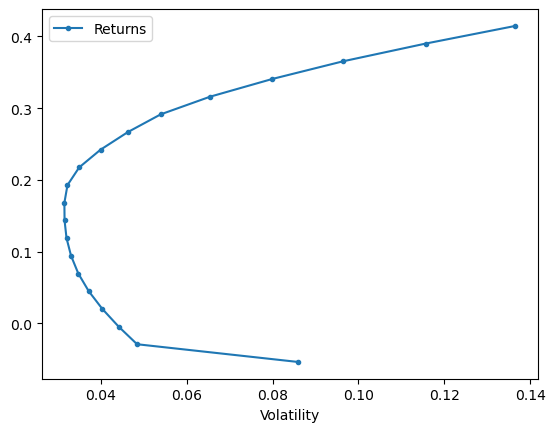

In [31]:
rk.plot_ef(20,er,cov)

(0.0, 0.14178366250985566)

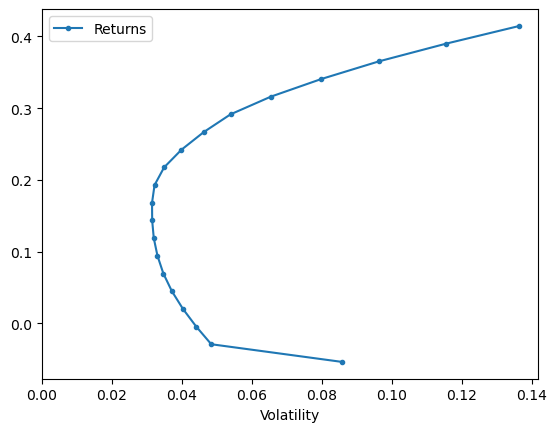

In [43]:
ax=rk.plot_ef(20,er,cov)
ax.set_xlim(left=0)

In [44]:
rf=0.1
w_msr=msr(rf,er,cov)
r_msr=rk.portfolio_return(w_msr,er)
vol_msr=rk.portfolio_vol(w_msr,cov)
# Add CML
cml_x=[0, vol_msr]
cml_y=[rf,r_msr]
ax.plot(cml_x, cml_y, color="green",marker="o",linestyle="dashed")


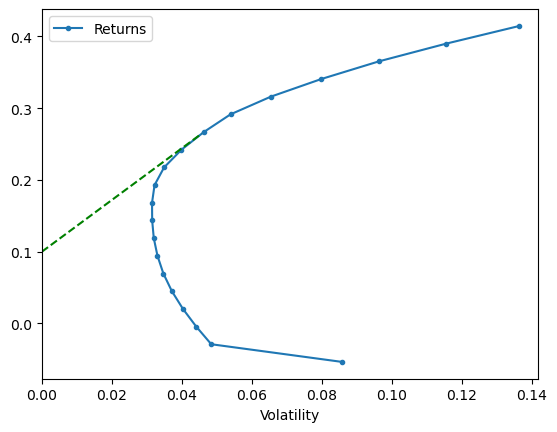

In [51]:
ax=rk.plot_ef(20,er,cov)
ax.set_xlim(left=0)
cml_x=[0, vol_msr]
cml_y=[rf,r_msr]
plt.plot(cml_x, cml_y, color="green", linestyle="dashed")
